In [ ]:
!pip install streamlit

In [ ]:
import pandas
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data_frame = pandas.read_csv("/content/yahoo_stock.csv",parse_dates = ['Date'],index_col = 'Date')
data_frame.drop(columns = ['Volume','Adj Close'],inplace = True)
data_frame.index = pandas.to_datetime(data_frame.index)
data_frame.sort_index(inplace = True)
data_frame.dropna(inplace = True)
data_frame.head()

,High,Low,Open,Close
Date,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107


In [ ]:
monthly_data_frame = data_frame.resample('ME').last()

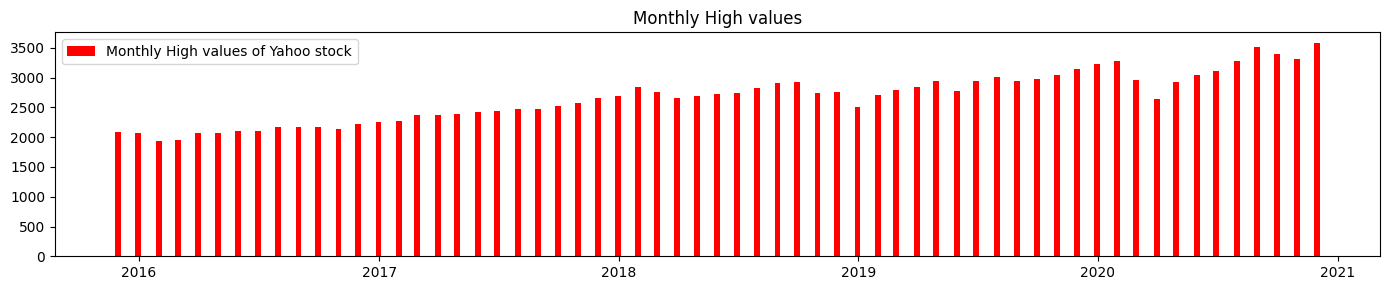

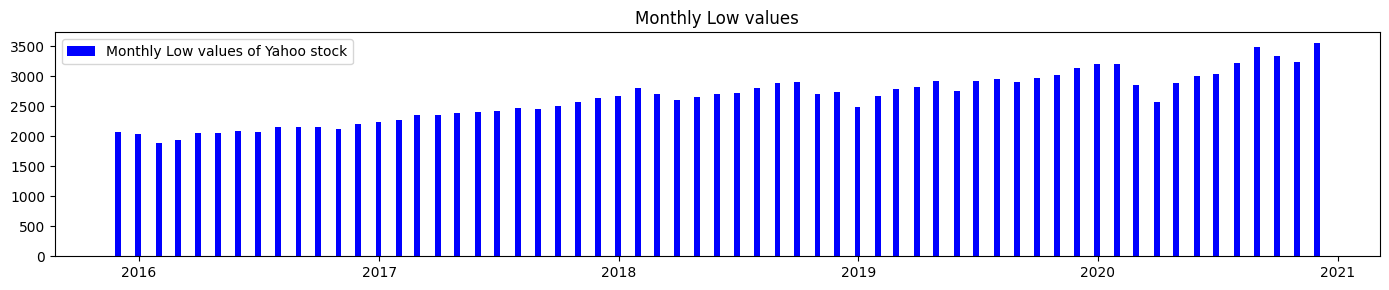

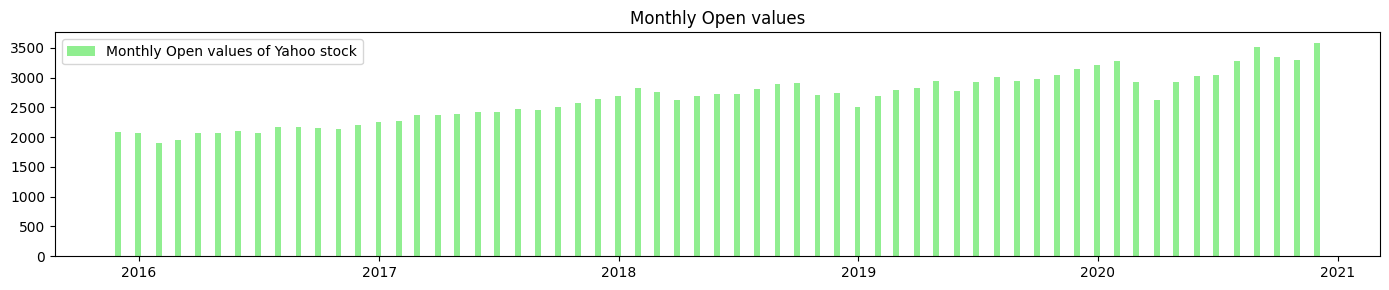

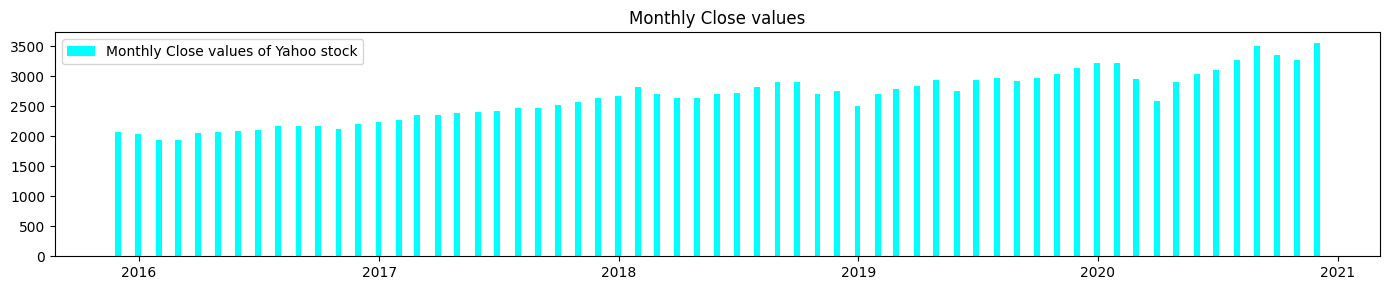

In [ ]:
plt.figure(figsize = (14,3))
plt.bar(monthly_data_frame.index,monthly_data_frame['High'].values,width = 9,label = 'Monthly High values of Yahoo stock',color = 'red')
plt.title("Monthly High values")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize = (14,3))
plt.bar(monthly_data_frame.index,monthly_data_frame['Low'].values,width = 9,label = 'Monthly Low values of Yahoo stock',color = 'blue')
plt.title("Monthly Low values")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize = (14,3))
plt.bar(monthly_data_frame.index,monthly_data_frame['Open'].values,width = 9,label = 'Monthly Open values of Yahoo stock',color = 'lightgreen')
plt.title("Monthly Open values")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize = (14,3))
plt.bar(monthly_data_frame.index,monthly_data_frame['Close'].values,width = 9,label = 'Monthly Close values of Yahoo stock',color = 'cyan')
plt.title("Monthly Close values")
plt.legend()
plt.tight_layout()
plt.show()

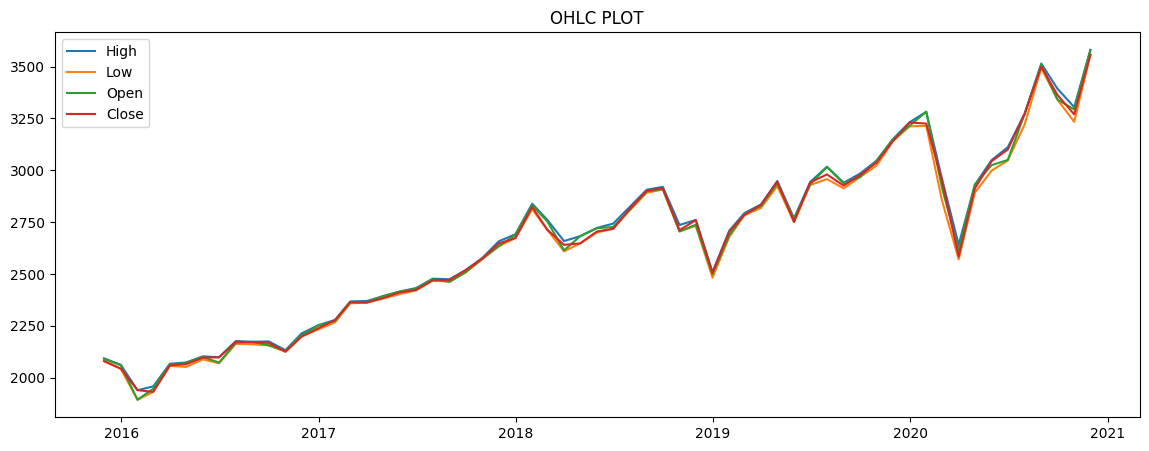

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(monthly_data_frame.index,monthly_data_frame['High'],label='High')
plt.plot(monthly_data_frame.index,monthly_data_frame['Low'],label='Low')
plt.plot(monthly_data_frame.index,monthly_data_frame['Open'],label='Open')
plt.plot(monthly_data_frame.index,monthly_data_frame['Close'],label='Close')
plt.title("OHLC PLOT")
plt.legend()
plt.show()

In [ ]:
!pip install mpl_finance

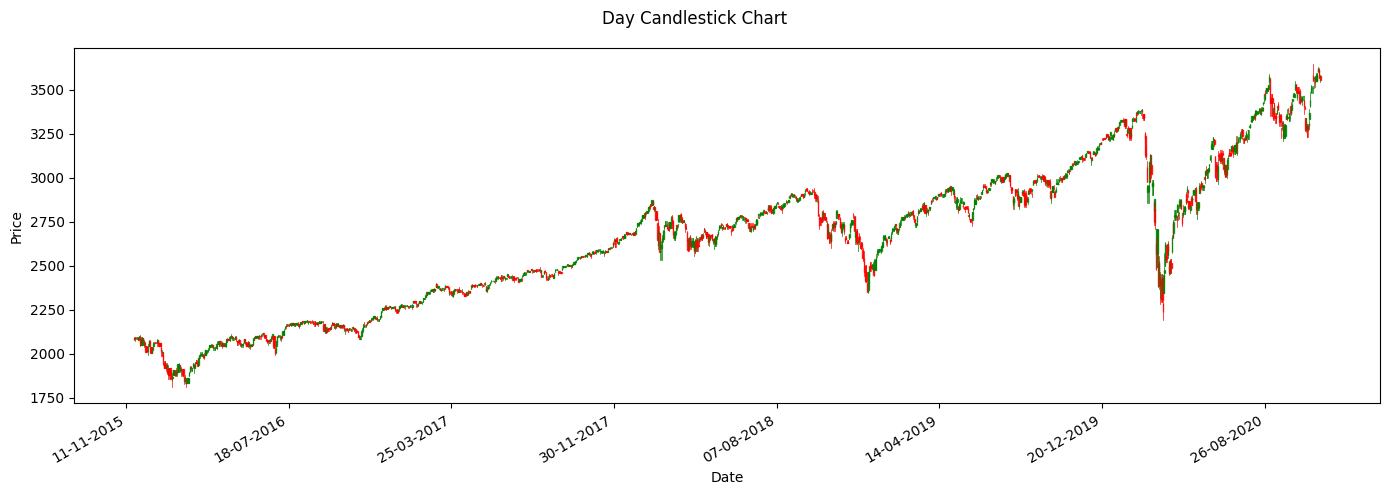

In [ ]:
import pandas
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
def Candle_Stick_Daily_Plot(file_path,title,figure_size):
    data = pandas.read_csv(file_path)
    ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
    ohlc['Date'] = pandas.to_datetime(ohlc['Date'])
    ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
    fig, ax = plt.subplots(figsize = figure_size)
    candlestick_ohlc(ax, ohlc.values, width=0.6,
                    colorup='green', colordown='red', alpha=0.8)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    fig.suptitle(title)
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()
file_path = "/content/yahoo_stock.csv"
Candle_Stick_Daily_Plot(file_path,"Day Candlestick Chart",(14,5))

<ipython-input-56-17e840ffbe55>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ohlc = data.resample('M').last()


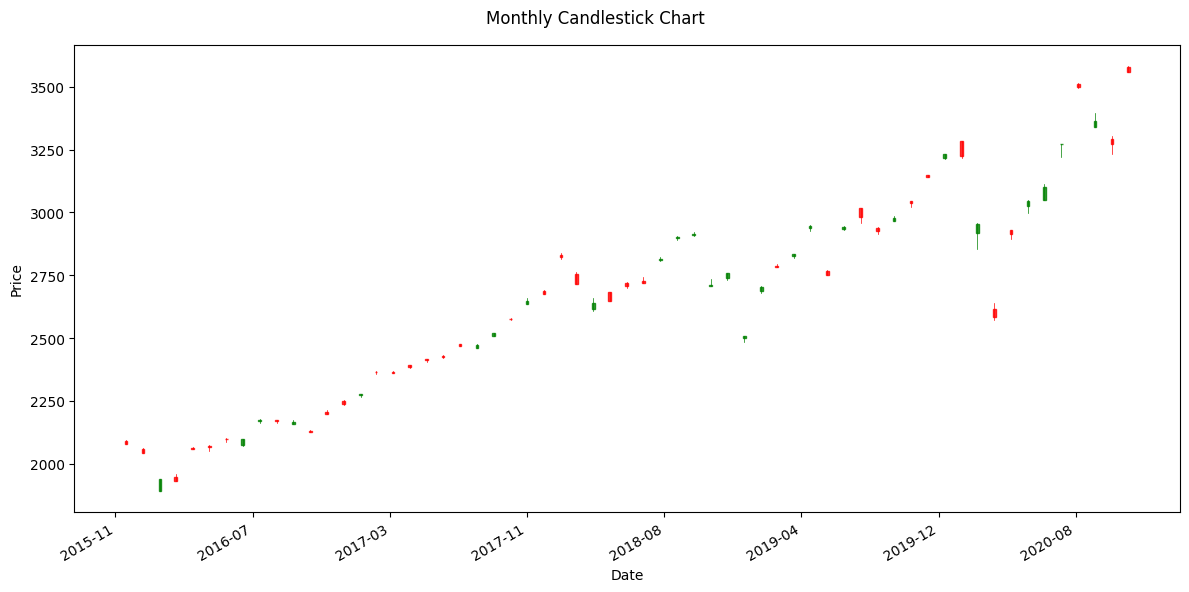

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc

def Candle_stick_plot(file_path, title, figure_size):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    ohlc = data.resample('M').last()
    ohlc.dropna(inplace=True)
    ohlc.reset_index(inplace=True)
    ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc[['Date', 'Open', 'High', 'Low', 'Close']].astype(float)
    fig, ax = plt.subplots(figsize=figure_size)
    candlestick_ohlc(ax, ohlc.values, width=5, colorup='green', colordown='red', alpha=0.8)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    fig.suptitle(title)
    date_format = mpl_dates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()
Candle_stick_plot("/content/yahoo_stock.csv", "Monthly Candlestick Chart", (12, 6))


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1825 non-null   float64
 1   Low     1825 non-null   float64
 2   Open    1825 non-null   float64
 3   Close   1825 non-null   float64
dtypes: float64(4)
memory usage: 71.3 KB


In [ ]:
Scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_frame = Scaler.fit_transform(data_frame)

In [ ]:
train_length = int(len(scaled_data_frame[:,0])*0.8)
time_step = 15
batch_size = 32
High_data = scaled_data_frame[:,0]
Low_data = scaled_data_frame[:,1]
Open_data = scaled_data_frame[:,2]
Close_data = scaled_data_frame[:,3]

In [ ]:
train_High_data = High_data[:train_length]
test_High_data = High_data[train_length - time_step:]
High_train_generator = TimeseriesGenerator(train_High_data,train_High_data,length = time_step,batch_size = batch_size)
High_test_generator = TimeseriesGenerator(test_High_data,test_High_data,length = time_step,batch_size = batch_size)

In [ ]:
train_Low_data = Low_data[:train_length]
test_Low_data = Low_data[train_length - time_step:]
Low_train_generator = TimeseriesGenerator(train_Low_data,train_Low_data,length = time_step,batch_size = batch_size)
Low_test_generator = TimeseriesGenerator(test_Low_data,test_Low_data,length = time_step,batch_size = batch_size)

In [ ]:
train_Open_data = Open_data[:train_length]
test_Open_data = Open_data[train_length - time_step:]
Open_train_generator = TimeseriesGenerator(train_Open_data,train_Open_data,length = time_step,batch_size = batch_size)
Open_test_generator = TimeseriesGenerator(test_Open_data,test_Open_data,length = time_step,batch_size = batch_size)

In [ ]:
train_Close_data = Close_data[:train_length]
test_Close_data = Close_data[train_length - time_step:]
Close_train_generator = TimeseriesGenerator(train_Close_data,train_Close_data,length = time_step,batch_size = batch_size)
Close_test_generator = TimeseriesGenerator(test_Close_data,test_Close_data,length = time_step,batch_size = batch_size)

In [ ]:
Model = Sequential()
Model.add(LSTM(50,activation = 'relu',return_sequences = True,input_shape = (time_step,1)))
Model.add(Dropout(0.5))
Model.add(LSTM(50,activation = 'relu',return_sequences = True))
Model.add(Dropout(0.5))
Model.add(LSTM(50,activation = 'relu',return_sequences = False))
Model.add(Dense(1))
Model.compile(optimizer = Adam(learning_rate=0.0005),loss='mse')
Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 15, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 15, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class CustomVerbose(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:  # Print only after every 5 epochs
            print(f"Epoch {epoch+1}: Loss = {logs['loss']:.6f}")
verbose_callback = CustomVerbose()

In [ ]:
data = [["High Model",High_train_generator,High_test_generator],
        ["Low Model",Low_train_generator,Low_test_generator],
        ["Open Model",Open_train_generator,Open_test_generator],
        ["Close Model",Close_train_generator,Close_test_generator]]
predicted = []
losses = []
for model_name,train_data_generator,test_data_generator in data:
  print(f"Training {model_name}")
  History = Model.fit(train_data_generator,epochs = 30,verbose = 0,callbacks=[verbose_callback])
  print(f"Training {model_name} is completed")
  loss_values = History.history['loss']
  losses.append(loss_values)
  print(f"losses of {model_name} have been collected")
  pred_values = Model.predict(test_data_generator)
  predicted.append(pred_values)
  print(f"{model_name} has predicted its values")
print("Traing is completed Sucessfully")

Training High Model


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 5: Loss = 0.002740
Epoch 10: Loss = 0.001835
Epoch 15: Loss = 0.002069
Epoch 20: Loss = 0.001369
Epoch 25: Loss = 0.001530
Epoch 30: Loss = 0.001010
Training High Model is completed
losses of High Model have been collected
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
High Model has predicted its values
Training Low Model
Epoch 5: Loss = 0.001330
Epoch 10: Loss = 0.001365
Epoch 15: Loss = 0.001314
Epoch 20: Loss = 0.001033
Epoch 25: Loss = 0.001044
Epoch 30: Loss = 0.001090
Training Low Model is completed
losses of Low Model have been collected
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Low Model has predicted its values
Training Open Model
Epoch 5: Loss = 0.000900
Epoch 10: Loss = 0.000870
Epoch 15: Loss = 0.000911
Epoch 20: Loss = 0.000889
Epoch 25: Loss = 0.000858
Epoch 30: Loss = 0.000773
Training Open Model is completed
losses of Open Model have been collected
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Open Model has predicted its values
Training Close Model
Epoch 5: Loss = 0.001331
Epo

In [ ]:
High_pred = predicted[0].reshape(-1,1)
Low_pred = predicted[1].reshape(-1,1)
Open_pred = predicted[2].reshape(-1,1)
Close_pred = predicted[3].reshape(-1,1)

In [ ]:
pred_data = np.hstack((High_pred,Low_pred,Open_pred,Close_pred))
scaler_inverse_data = Scaler.inverse_transform(pred_data)
print(scaler_inverse_data.shape)

(365, 4)


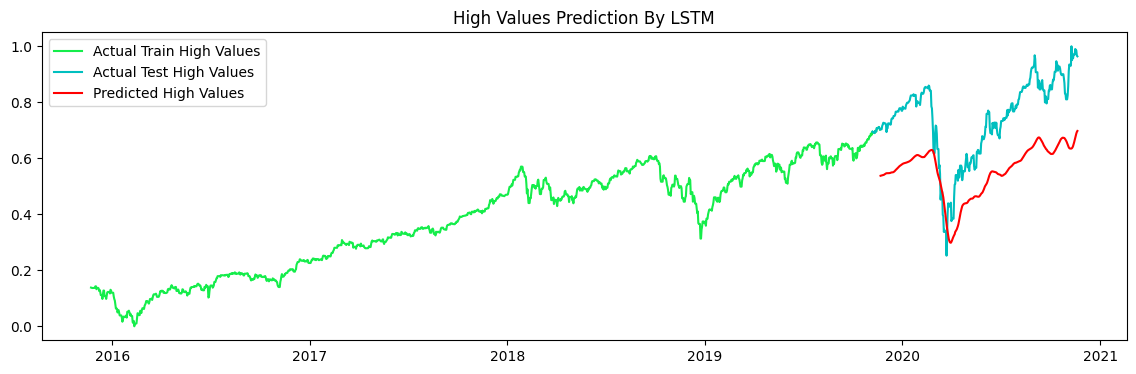

In [ ]:
plt.figure(figsize = (14,4))
plt.title("High Values Prediction By LSTM")
plt.plot(data_frame.index[:train_length],train_High_data,label = 'Actual Train High Values',c = '#15ed4b')
plt.plot(data_frame.index[train_length-time_step:],test_High_data,label = "Actual Test High Values", c = 'c')
plt.plot(data_frame.index[train_length:],pred_data[:,0],label = 'Predicted High Values',c = 'r')
plt.legend()
plt.show()

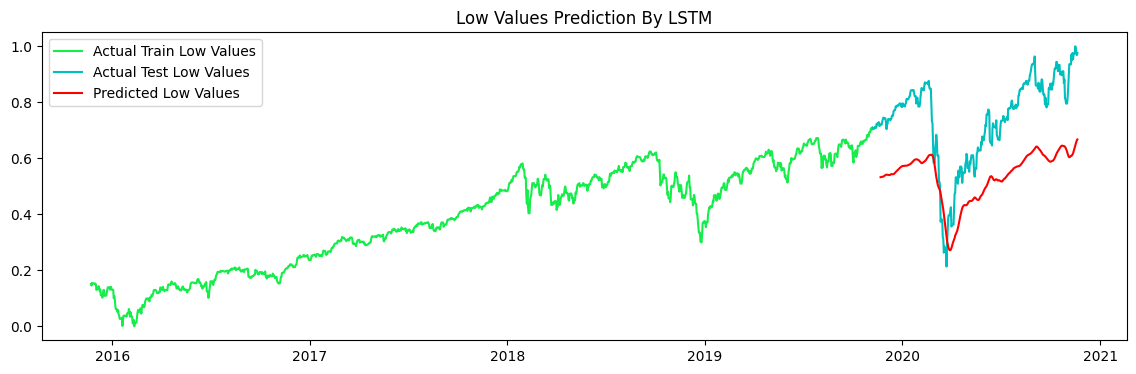

In [ ]:
plt.figure(figsize = (14,4))
plt.title("Low Values Prediction By LSTM")
plt.plot(data_frame.index[:train_length],train_Low_data,label = 'Actual Train Low Values',c = '#15ed4b')
plt.plot(data_frame.index[train_length-time_step:],test_Low_data,label = "Actual Test Low Values", c = 'c')
plt.plot(data_frame.index[train_length:],pred_data[:,1],label = 'Predicted Low Values',c = 'r')
plt.legend()
plt.show()

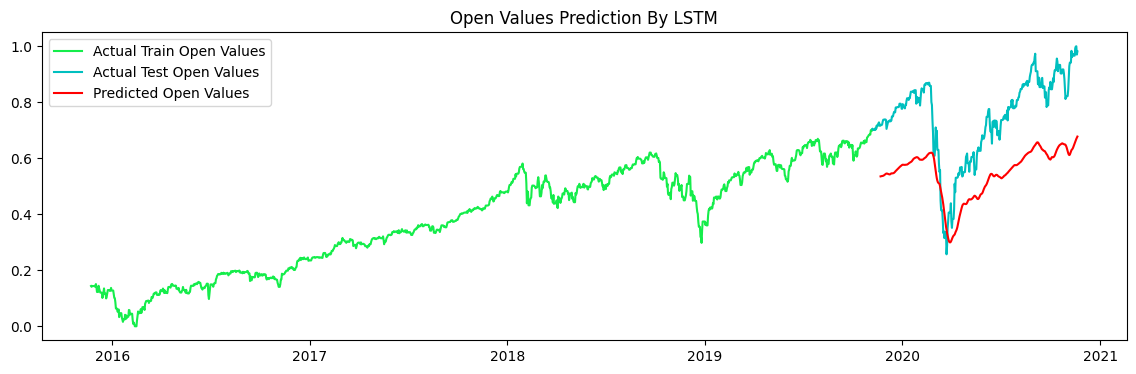

In [ ]:
plt.figure(figsize = (14,4))
plt.title("Open Values Prediction By LSTM")
plt.plot(data_frame.index[:train_length],train_Open_data,label = 'Actual Train Open Values',c = '#15ed4b')
plt.plot(data_frame.index[train_length-time_step:],test_Open_data,label = "Actual Test Open Values", c = 'c')
plt.plot(data_frame.index[train_length:],pred_data[:,2],label = 'Predicted Open Values',c = 'r')
plt.legend()
plt.show()

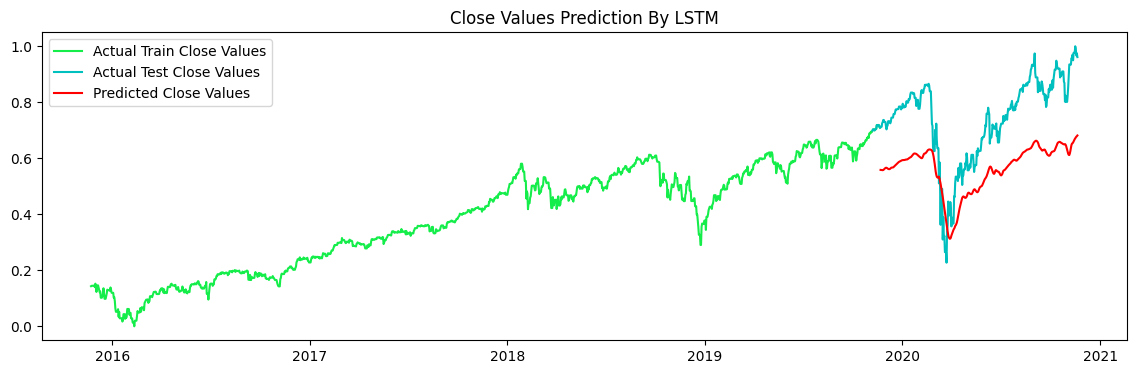

In [ ]:
plt.figure(figsize = (14,4))
plt.title("Close Values Prediction By LSTM")
plt.plot(data_frame.index[:train_length],train_Close_data,label = 'Actual Train Close Values',c = '#15ed4b')
plt.plot(data_frame.index[train_length-time_step:],test_Close_data,label = "Actual Test Close Values", c = 'c')
plt.plot(data_frame.index[train_length:],pred_data[:,3],label = 'Predicted Close Values',c = 'r')
plt.legend()
plt.show()

In [ ]:
scaler_inverse_data[3][3]

2831.371

In [ ]:
eval_data_frame = pandas.read_csv("/content/yahoo_stock.csv")
eval_data_frame.drop(columns = ['Volume','Adj Close'],inplace = True)
actual_data_frame = eval_data_frame.head(1460)
pred_data = pandas.read_csv("/content/yahoo_stock.csv")
pred_data = pred_data.tail(365)
pred_data.drop(columns = ['High','Low','Open','Close','Volume','Adj Close'],inplace = True)
pred_data.info()
pred_data['High'] = scaler_inverse_data[:,0]
pred_data['Low'] = scaler_inverse_data[:,1]
pred_data['Open'] = scaler_inverse_data[:,2]
pred_data['Close'] = scaler_inverse_data[:,3]
ultimate_data = pandas.concat([eval_data_frame,pred_data])
pred_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1460 to 1824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


,Date,High,Low,Open,Close
1460,2019-11-22,2814.029053,2763.258545,2785.556152,2833.127930
1461,2019-11-23,2814.950684,2763.930176,2786.671631,2832.607422
1462,2019-11-24,2815.823486,2764.685791,2787.770752,2831.954834
1463,2019-11-25,2816.573730,2765.055176,2788.166748,2831.371094
1464,2019-11-26,2817.303467,2765.546875,2788.419189,2831.449707


In [ ]:
print(pred_data.shape)

(365, 5)


<ipython-input-76-a3d279a59bbf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['Date'] = actual_data['Date'].apply(mpl_dates.date2num)
<ipython-input-76-a3d279a59bbf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_data['Date'] = predicted_data['Date'].apply(mpl_dates.date2num)


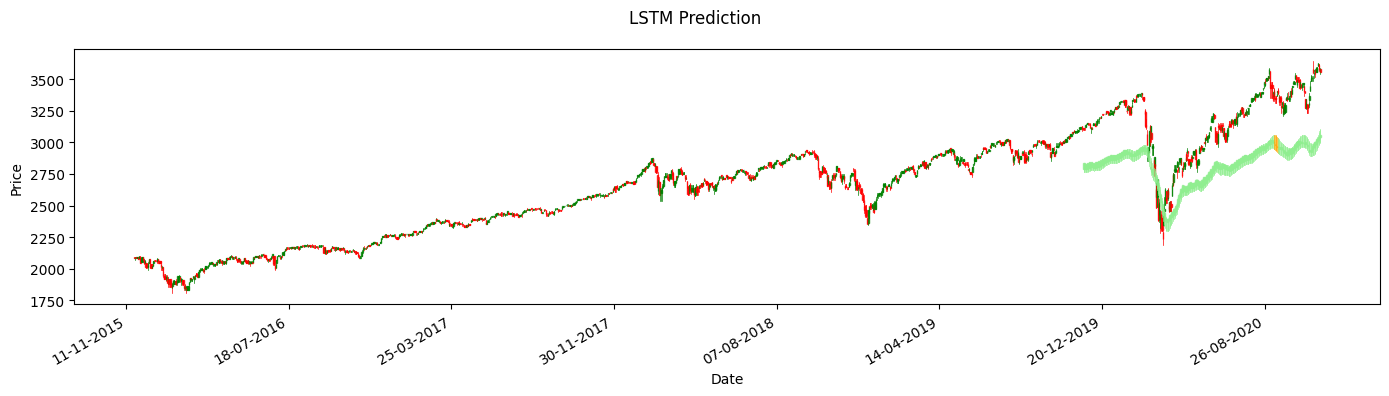

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc

def Candle_Stick_Daily_Plot(data_frame, title, figure_size):
    data = data_frame
    ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
    # Convert date into datetime format
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    # Split actual and predicted data
    actual_data = ohlc.iloc[:-365]
    predicted_data = ohlc.iloc[-365:]
    # Convert date to numeric format for plotting
    actual_data['Date'] = actual_data['Date'].apply(mpl_dates.date2num)
    predicted_data['Date'] = predicted_data['Date'].apply(mpl_dates.date2num)
    # Convert to float
    actual_data = actual_data.astype(float)
    predicted_data = predicted_data.astype(float)
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figure_size)
    # Plot actual data in green
    candlestick_ohlc(ax, actual_data.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    # Plot predicted data in blue
    candlestick_ohlc(ax, predicted_data.values, width=0.6, colorup='lightgreen', colordown='orange', alpha=0.8)
    # Setting labels & titles
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    fig.suptitle(title)
    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.tight_layout()
    # Show plot
    plt.show()
Candle_Stick_Daily_Plot(ultimate_data, "LSTM Prediction", (14,4))

In [ ]:
actual_data = pandas.read_csv("/content/yahoo_stock.csv")
actual_data.drop(columns = ['Volume','Adj Close'],inplace =True)
actual_data = actual_data.tail(365)

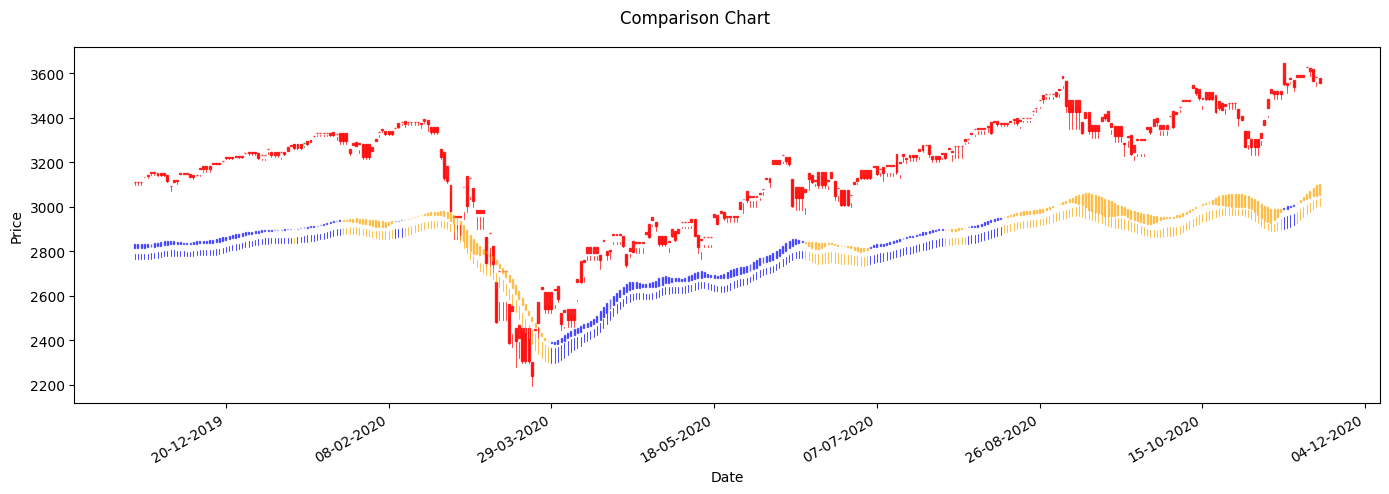

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
# WARNING - works on data frames with same dimensions and same time stamps
def Candle_Stick_Comparison_Plot(actual_df, predicted_df, title, figure_size):
    # Ensure 'Date' column is in datetime format
    actual_df['Date'] = pd.to_datetime(actual_df['Date'])
    predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])

    # Convert dates to numerical format for plotting
    actual_df['Date'] = actual_df['Date'].apply(mpl_dates.date2num)
    predicted_df['Date'] = predicted_df['Date'].apply(mpl_dates.date2num)

    # Convert to float
    actual_df = actual_df.astype(float)
    predicted_df = predicted_df.astype(float)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figure_size)

    # Plot actual data (green/red for up/down)
    candlestick_ohlc(ax, actual_df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

    # Plot predicted data (blue/orange for up/down)
    candlestick_ohlc(ax, predicted_df.values, width=0.3, colorup='blue', colordown='orange', alpha=0.6)

    # Setting labels & title
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    fig.suptitle(title)

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.tight_layout()

    # Show plot
    plt.show()
Candle_Stick_Comparison_Plot(actual_data, pred_data, "Comparison Chart", (14,5))